In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [107]:
# Create a DataFrame for the data
iris_df = sns.load_dataset("iris")

print(iris_df.shape)

iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


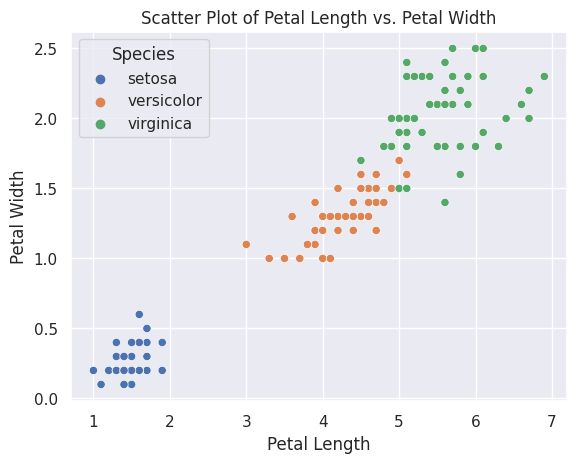

In [108]:

# Create the scatter plot
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=iris_df)

# Add labels and a legend
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Scatter Plot of Petal Length vs. Petal Width")
plt.legend(title="Species")

# Show the plot
plt.show()

In [109]:
# Separate the feature columns (X) from the target column (y)
X = iris_df.drop("species", axis=1)  # X contains feature columns (sepal_length, sepal_width, petal_length, petal_width)
y = iris_df["species"]  # y contains the target column (species)

# Verify the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


In [110]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [111]:
print(len(X_train))
print(len(X_test))

105
45


In [112]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled[0:4]

array([[-0.78847931,  2.2916743 , -1.25456793, -1.40976967],
       [ 1.29661042,  0.0322771 ,  0.66355092,  0.41288769],
       [ 0.07008705,  0.25821682,  0.60713566,  0.80345712],
       [-0.29786996, -0.64554206,  0.66355092,  1.06383675]])

In [114]:
X_test_scaled[0:4]

array([[ 0.5606964 , -1.77524065,  0.38147462,  0.15250807],
       [ 0.68334873, -0.87148177,  0.88921196,  0.93364693],
       [-0.54317463,  1.38791542, -1.25456793, -1.27957986],
       [ 0.31539172, -0.19366262,  0.49430514,  0.28269788]])

In [115]:
# Apply PCA
pca = PCA(n_components=4)  # Number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [116]:
print(len(X_train_pca))
print(len(X_test_pca))

105
45


In [117]:
X_train_pca[0:4]

array([[-2.59026018e+00,  1.62985852e+00,  9.29481836e-02,
         2.45633848e-01],
       [ 1.27240289e+00,  6.04389977e-01, -5.55622122e-01,
        -2.03416271e-03],
       [ 7.65255071e-01,  3.36376338e-01,  6.17411495e-01,
         7.60516996e-02],
       [ 1.01823383e+00, -6.15362888e-01,  8.12233280e-01,
        -4.80102423e-02]])

In [118]:
X_test_pca[0:4]

array([[ 1.10967191, -1.3656458 , -0.71798358, -0.15093311],
       [ 1.64432678, -0.42456153,  0.0042274 , -0.06898971],
       [-2.1288998 ,  0.91781063, -0.24083427, -0.00462114],
       [ 0.66357347, -0.01539244, -0.02279857,  0.14193788]])

In [119]:
pca.explained_variance_ratio_

array([0.73220751, 0.22425849, 0.03893009, 0.00460392])

In [120]:
# Apply PCA
pca = PCA(n_components=2)  # Number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [121]:
print(X_train_pca.shape)

(105, 2)


In [122]:
X_train_pca[0:4]

array([[-2.59026018,  1.62985852],
       [ 1.27240289,  0.60438998],
       [ 0.76525507,  0.33637634],
       [ 1.01823383, -0.61536289]])

In [123]:
# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.82      0.90        17
   virginica       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [124]:
# Combine the training and testing principal components and target variable
X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

# Create a DataFrame for the combined data
combined_df = pd.DataFrame(data=X_combined_pca, columns=["Principal Component 1", "Principal Component 2"])
combined_df["Target"] = y_combined

print(combined_df.shape)
combined_df.head()



(150, 3)


,Principal Component 1,Principal Component 2,Target
0,-2.590260,1.629859,setosa
1,1.272403,0.604390,versicolor
2,0.765255,0.336376,versicolor
3,1.018234,-0.615363,virginica
4,2.010072,1.021467,virginica


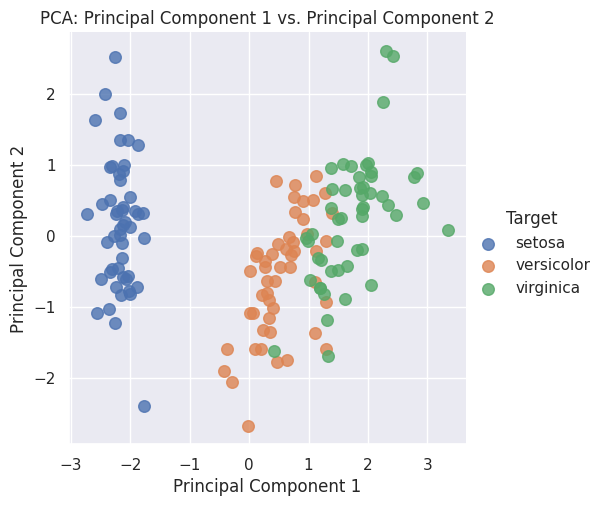

In [125]:
# Create a scatter plot
sns.set(style="darkgrid")
sns.lmplot(x="Principal Component 1", y="Principal Component 2", hue="Target", data=combined_df, fit_reg=False, scatter_kws={"s": 70})
plt.title("PCA: Principal Component 1 vs. Principal Component 2")
plt.show()